In [236]:
import numpy as np
import sys
import os
from array import array

from struct import *
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import torch
from tqdm import tqdm
from random import shuffle

In [291]:
#파일 읽기
fp_image = open('./dataset/train-images-idx3-ubyte','rb')
fp_label = open('./dataset/train-labels-idx1-ubyte','rb')

#사용할 변수 초기화
img = np.zeros((28,28)) #이미지가 저장될 부분
lbl = [ [],[],[],[],[],[],[],[],[],[] ] #숫자별로 저장 (0 ~ 9)
d = 0
l = 0
index=0

s = fp_image.read(16)    #read first 16byte
l = fp_label.read(8)     #read first  8byte

k=0 #테스트용 index
#read mnist and show number
while True:    
    s = fp_image.read(784) #784바이트씩 읽음
    l = fp_label.read(1) #1바이트씩 읽음
    if not s:break
    if not l:break
    index = int(l[0])

    img = np.reshape(unpack(len(s)*'B',s), (28,28))
    lbl[index].append(img) #각 숫자영역별로 해당이미지를 추가
    k=k+1
    
# https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=acwboy&logNo=220584307823

In [151]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv = torch.nn.Sequential(
            torch.nn.Conv2d(1, 4, kernel_size=4, padding = 2),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size = 4, stride = 2, padding=2),
            torch.nn.Conv2d(4,16, kernel_size=2, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride = 1, padding=1),
            torch.nn.AdaptiveAvgPool2d((6,6))
        )
        self.classifier = torch.nn.Sequential(
            torch.nn.Dropout(0.5),
            torch.nn.Linear(16*6*6, 512),
            torch.nn.ReLU(inplace=True),
            torch.nn.Dropout(0.5),
            torch.nn.Linear(512, 512),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(512,10)
        )
    def forward(self, x):
        x = self.conv(x)
        x = torch.flatten(x,1)
        x = self.classifier(x)
        return x

In [146]:
model = Model()

In [234]:
data = []
X = []
Y = []

for i,l in enumerate(lbl):
    for ll in l:
        data.append([ll.reshape(1,ll.shape[0], ll.shape[1]), i])

shuffle(data)

X = [d[0].reshape(1,28,28) for d in data]
Y = [d[1] for d in data]

In [263]:
optimizer = torch.optim.Adam(params = model.parameters(), lr = 1e-3)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0 = 128)
criterion = torch.nn.CrossEntropyLoss()

In [264]:
batch_size = 64
batch_num = int((len(data)-1)/batch_size) + 1

In [265]:
model.train()
for epoch in range(16):
    losses = []
    for batch in tqdm(range(batch_num)):
        batch_X = torch.tensor(X[batch*batch_size:(batch+1)*batch_size])
        batch_Y = torch.tensor(Y[batch*batch_size:(batch+1)*batch_size])
        pred = model(batch_X.float())
        loss = criterion(pred, batch_Y)
        losses.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step(epoch + batch/batch_num)
    print(np.mean(losses))

100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:13<00:00, 71.05it/s]


2.005300014003762


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:13<00:00, 70.47it/s]


1.324746534260097


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:13<00:00, 70.19it/s]


1.032169866250522


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:13<00:00, 69.67it/s]


0.6171224903005527


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:13<00:00, 69.34it/s]


0.5124112150308165


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:13<00:00, 69.04it/s]


0.44336513481509965


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:13<00:00, 68.88it/s]


0.39246926782354874


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:13<00:00, 68.91it/s]


0.35921418059990606


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:13<00:00, 69.18it/s]


0.32940851597548293


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:13<00:00, 69.11it/s]


0.31755775817310505


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:13<00:00, 68.88it/s]


0.3103772703168997


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:13<00:00, 69.21it/s]


0.29563705762550396


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:13<00:00, 69.16it/s]


0.2845963091373062


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:13<00:00, 68.82it/s]


0.27696078676960745


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:13<00:00, 68.94it/s]


0.26938121076792415


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:13<00:00, 69.25it/s]

0.2579324093939208


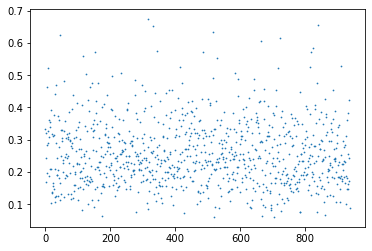

In [266]:
plt.scatter([i for i in range(len(losses))], losses, s= 0.5)

In [275]:
model.eval()
torch.argmax(model(torch.tensor(X[2].reshape(1,1,28,28)).float())).item()

5

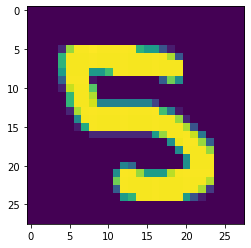

In [274]:
plt.imshow(X[2][0])

In [276]:
Y[0]

8

In [278]:
scr = 0
for i in tqdm(range(60000)):
    scr += torch.argmax(model(torch.tensor(X[i].reshape(1,1,28,28)).float())).item()==Y[i]

100%|██████████████████████████████████████████████████████████████████████████| 60000/60000 [00:19<00:00, 3009.13it/s]


In [280]:
scr/60000

0.9667333333333333

In [285]:
#파일 읽기
fp_image = open('./dataset/t10k-images-idx3-ubyte','rb')
fp_label = open('./dataset/t10k-labels-idx1-ubyte','rb')

#사용할 변수 초기화
img = np.zeros((28,28)) #이미지가 저장될 부분
lbl = [ [],[],[],[],[],[],[],[],[],[] ] #숫자별로 저장 (0 ~ 9)
d = 0
l = 0
index=0

s = fp_image.read(16)    #read first 16byte
l = fp_label.read(8)     #read first  8byte

k=0 #테스트용 index
#read mnist and show number
while True:    
    s = fp_image.read(784) #784바이트씩 읽음
    l = fp_label.read(1) #1바이트씩 읽음
    if not s:break
    if not l:break
    index = int(l[0])

    img = np.reshape(unpack(len(s)*'B',s), (28,28))
    lbl[index].append(img) #각 숫자영역별로 해당이미지를 추가
    k=k+1

In [283]:
with open("./dataset/train_X.pickle", mode="wb") as f:pickle.dump(X,f)

In [284]:
with open("./dataset/train_Y.pickle", mode="wb") as f:pickle.dump(Y,f)

In [286]:
_data = []
_X = []
_Y = []

for i,l in enumerate(lbl):
    for ll in l:
        _data.append([ll.reshape(1,ll.shape[0], ll.shape[1]), i])

shuffle(_data)

_X = [d[0].reshape(1,28,28) for d in _data]
_Y = [d[1] for d in _data]

In [288]:
len(_Y)

10000

In [289]:
scr = 0
for i in tqdm(range(10000)):
    scr += torch.argmax(model(torch.tensor(_X[i].reshape(1,1,28,28)).float())).item()==_Y[i]

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2981.82it/s]


In [290]:
scr

9654